# **Housing Price Prediction with Linear Regression**
*This script uses a dataset containing housing information to predict prices using a linear regression model. Here's a breakdown of what it does*:

**Data Cleaning and Preparation**:

*Loads housing data from a CSV file.
Cleans the data by converting incorrect values and dropping unnecessary rows.
Exploratory Data Analysis*:

Visualizes the relationship between house size and price.
Filters outliers and drops duplicates.
Pipeline for Machine Learning:

Prepares the data for machine learning using pipelines and transformers.
Splits the dataset into training and test sets.
Model Training and Evaluation:

Trains a Linear Regression model on the prepared data.
Evaluates the model's performance using Mean Absolute Error (MAE).
Results:

Prints the model coefficients and the calculated MAE.
This script is useful for understanding data preprocessing, building machine learning pipelines, and evaluating model performance for predicting housing prices.

# **Lineyka Regressiya bilan Uy Narxlari Bashorati**

*Ushbu skript uy narxlari bilan bog'liq ma'lumotlar to'plamini ishlatib, lineyka regressiya modeli orqali narxlarni bashorat qiladi. Ushbu skript nima qilishini quyidagi ko'rinishda ifodalaydi:*

### Ma'lumotlar Tozalash va Tayyorlash:

*CSV faylidan uy narxlari ma'lumotlarini yuklaydi.
Ma'lumotlarni tozalaydi va noto'g'ri qiymatlarni to'g'rilaydi.
Tahliliy Ma'lumotlar Analizi:*

Uy o'lchami va narx o'rtasidagi munosabatni vizual ko'rsatadi.
Tengsizliklarni filtrlaydi va takrorlanishlarni olib tashlaydi.
Mashina O'rganish Uchun Pipelini:

Mashina o'rganish uchun pipelinalar va o'zgaruvchilar bilan ma'lumotlarni tayyorlash.
Ma'lumotlar to'plamini o'qitish va sinovlar uchun bo'lib ajratadi.
Modelni O'rganish va Baholash:

Tayyorlangan ma'lumotlar ustida Lineyka Regressiya modelini o'rganadi.
Mean Absolute Error (MAE) yordamida modelning boshorat samaradorligini baholaydi.
Natijalar:

Model koefitsiyentlarini va hisoblangan MAE ni chiqaradi.
Ushbu skript ma'lumotlar tozalash, mashina o'rganish pipelinalarini qurish va uy narxlari bashorat qilish uchun modelning samaradorligini baholashda foydali bo'ladi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 7466 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7466 non-null   object 
 1   district    7466 non-null   object 
 2   rooms       7466 non-null   int64  
 3   size        7466 non-null   float64
 4   level       7466 non-null   int64  
 5   max_levels  7466 non-null   int64  
 6   price       7466 non-null   int64  
dtypes: floa

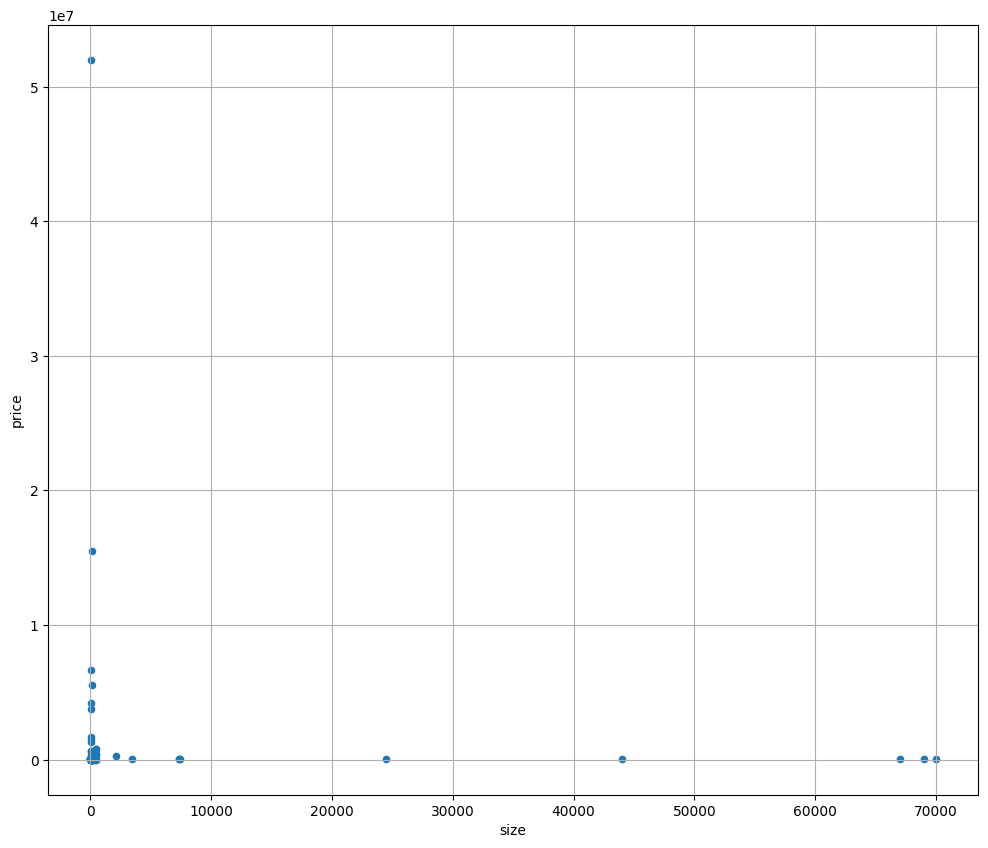

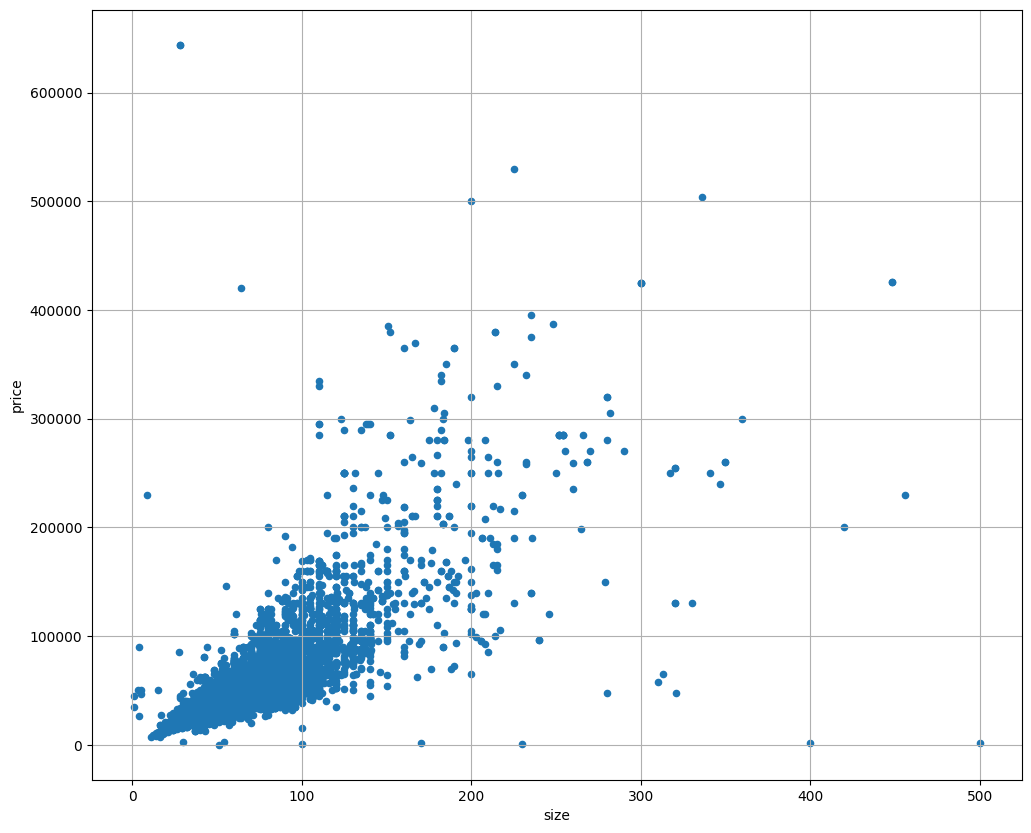

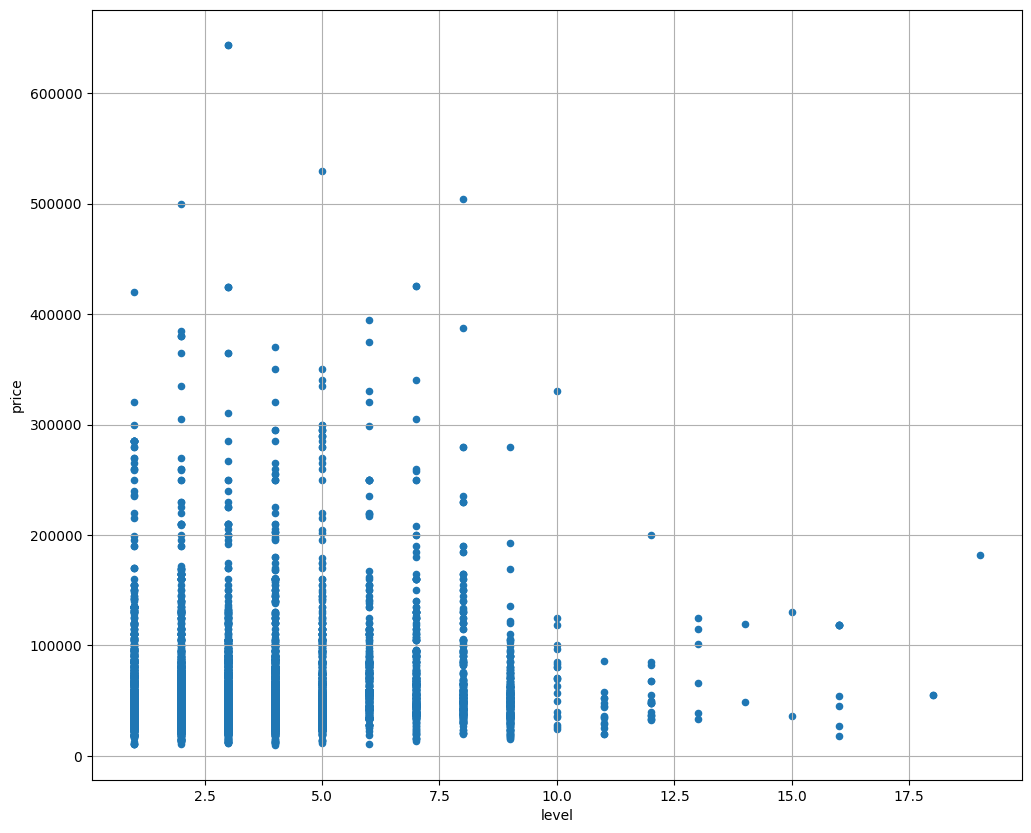

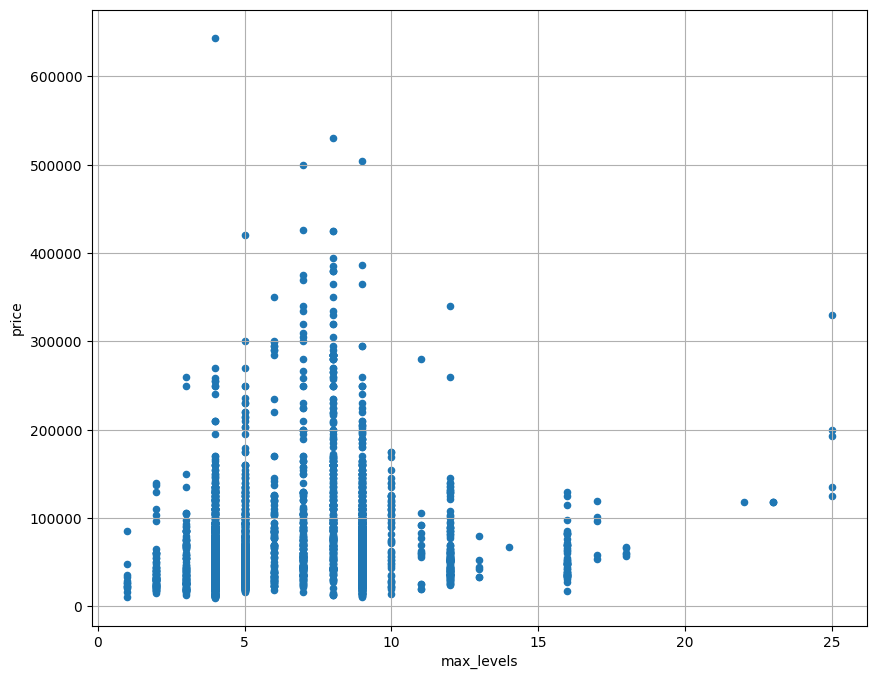

Mean Absolute Error: 13519.910645224176
[-11306.06496869  44192.2853063   -4542.73463685   2588.24678987
  -4696.70350087 -10973.42281219  19462.55071103   3639.99614675
  -7958.20642225 -13883.17068366  -3380.23067416   -255.18907132
    979.86211704   3436.07526751  12011.54005814   -500.127056
  -2579.6775809 ]


,district,rooms,size,level,max_levels,price,per_room_size
0,Юнусабадский,3,57.0,4,4,52000,19.000000
1,Яккасарайский,2,52.0,4,5,56000,26.000000
2,Чиланзарский,2,42.0,4,4,37000,21.000000
3,Чиланзарский,3,65.0,1,4,49500,21.666667
4,Чиланзарский,3,70.0,3,5,55000,23.333333
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500,38.000000
7561,Яшнободский,2,49.0,1,4,32000,24.500000
7562,Шайхантахурский,2,64.0,3,9,40000,32.000000
7563,Мирзо-Улугбекский,1,18.0,1,4,11000,18.000000


In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# %matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

df.info()

df[df['size'] == 'Площадьземли:1сот']

df.loc[[5347], ['size']] = 100

df['size'] = df['size'].astype(dtype='float')

idx = df[df['price'] == 'Договорная'].index
df.drop(idx, axis=0, inplace=True)

df['price'] = df['price'].astype(dtype='int')

df.info()

df.describe()

df.to_csv('Toshkent.csv')

df.plot(kind='scatter', x='size', y='price', figsize=(12, 10))
plt.grid()
plt.show()

idx1 = df[(df['size'] > 1000) | (df['price'] >= 8_000_00)].index
df.drop(idx1, axis=0, inplace=True)

df.plot(kind='scatter', x='size', y='price', figsize=(12, 10))
plt.grid()
plt.show()

df.drop(df[df['size'] < 12].index, axis=0, inplace=True)

df.drop(df[df['price'] < 10000].index, axis=0, inplace=True)

df.plot(kind='scatter', x='level', y='price', figsize=(12, 10))
plt.grid()
plt.show()

df.drop(df[df['level'] > 17].index, axis=0, inplace=True)

df[df.price > 60_0000]

df[df.duplicated() == True]

df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.plot(kind='scatter', x='max_levels', y='price', figsize=(10, 8))
plt.grid()
plt.show()

df['per_room_size'] = df['size'] / df['rooms']

df.drop('location', axis=1, inplace=True)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=19)

housing = train_set.copy()
housing.drop(labels='price', axis=1, inplace=True)

housing_num = housing.drop(labels=['district', 'per_room_size'], axis=1)

from sklearn.base import BaseEstimator, TransformerMixin

size_ix, rooms_ix = 1, 0

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        per_room_size = X[:, size_ix] / X[:, rooms_ix]
        return np.c_[X, per_room_size]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

num_pipeline.fit_transform(housing_num)

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

"""LinerModel"""

y = train_set['price'].copy()

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(housing_prepared, y)

X_test = test_set.drop('price', axis=1)
X_test_prepared = full_pipeline.transform(X_test)

y_predict = linear_model.predict(X_test_prepared)

y_predict = linear_model.predict(X_test_prepared)
y_true = np.asanyarray(test_set['price'])

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_true, y_predict)
print("Mean Absolute Error:", MAE)
print(linear_model.coef_)

linear_model.coef_

df
